In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../../data/processed/traffic/traffic_base.csv')

In [3]:
df['start'] = df['start'].astype('datetime64[ns]')
df['end'] = df['end'].astype('datetime64[ns]')

In [4]:
df.head()

,Unnamed: 0,station,latitude,longitude,distance,event,year,title,volume,start,end,location
0,116,samut-prakan,13.775381,100.466047,14.953275,traffic,2017,Heavy traffic at Bang Khun Non Rd.,0.041667,2017-01-01 11:41:43,2017-01-01 12:41:43,samut-prakan
1,131,samut-prakan,14.654970,101.348684,88.372394,traffic,2017,Heavy traffic at Mittraphap Rd.,0.041667,2017-01-01 12:48:50,2017-01-01 13:48:50,samut-prakan
2,141,samut-prakan,14.210257,101.905146,97.376427,traffic,2017,Heavy traffic at National Highway 304,0.083333,2017-01-01 13:42:38,2017-01-01 15:42:38,samut-prakan
3,143,samut-prakan,13.742417,100.252906,25.125208,traffic,2017,Heavy traffic at National Highway 3316,0.043750,2017-01-01 13:57:23,2017-01-01 15:00:23,samut-prakan
4,150,samut-prakan,17.102243,103.014947,289.861693,traffic,2017,A year's worth of traffic accident.,0.041667,2017-01-01 13:02:00,2017-01-01 14:02:00,samut-prakan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42264 entries, 0 to 42263
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  42264 non-null  int64         
 1   station     42264 non-null  object        
 2   latitude    42264 non-null  float64       
 3   longitude   42264 non-null  float64       
 4   distance    42264 non-null  float64       
 5   event       42264 non-null  object        
 6   year        42264 non-null  int64         
 7   title       42264 non-null  object        
 8   volume      42264 non-null  float64       
 9   start       42264 non-null  datetime64[ns]
 10  end         42264 non-null  datetime64[ns]
 11  location    42264 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 3.9+ MB


In [6]:
df.describe()

,Unnamed: 0,latitude,longitude,distance,year,volume,start,end
count,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264,42264
mean,233236.074011,13.910230,100.629090,1960.166901,2019.453625,0.052385,2019-12-31 14:13:32.541926912,2019-12-31 15:51:35.992049920
min,116.000000,6.866159,-77.113650,0.056380,2017.000000,0.000000,2017-01-01 11:41:43,2017-01-01 12:41:43
25%,139077.000000,13.711831,100.524910,11.286939,2018.000000,0.041667,2018-07-14 21:27:00,2018-07-14 22:27:00
50%,246642.500000,13.767628,100.575610,24.347733,2019.000000,0.041667,2019-10-28 07:54:10,2019-10-28 08:54:10
75%,330758.000000,13.860027,100.643778,7421.374728,2021.000000,0.041667,2021-03-21 15:22:59,2021-03-21 16:22:59
max,415488.000000,39.078284,105.161914,8806.185898,2023.000000,0.999988,2023-12-30 19:40:47,2023-12-30 20:40:47
std,117791.667025,0.724070,1.784693,3341.420016,1.855045,0.066348,NaN,NaN


In [7]:
df.groupby('year')['event'].count()

year
2017    6792
2018    8144
2019    9796
2020    5952
2021    3596
2022    4180
2023    3804
Name: event, dtype: int64

In [8]:
# we only need traffic start because thats when the traffic started...obviously...
df['start_year'] = df['start'].dt.year
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day

In [9]:
df.head()

,Unnamed: 0,station,latitude,longitude,distance,event,year,title,volume,start,end,location,start_year,start_month,start_day
0,116,samut-prakan,13.775381,100.466047,14.953275,traffic,2017,Heavy traffic at Bang Khun Non Rd.,0.041667,2017-01-01 11:41:43,2017-01-01 12:41:43,samut-prakan,2017,1,1
1,131,samut-prakan,14.654970,101.348684,88.372394,traffic,2017,Heavy traffic at Mittraphap Rd.,0.041667,2017-01-01 12:48:50,2017-01-01 13:48:50,samut-prakan,2017,1,1
2,141,samut-prakan,14.210257,101.905146,97.376427,traffic,2017,Heavy traffic at National Highway 304,0.083333,2017-01-01 13:42:38,2017-01-01 15:42:38,samut-prakan,2017,1,1
3,143,samut-prakan,13.742417,100.252906,25.125208,traffic,2017,Heavy traffic at National Highway 3316,0.043750,2017-01-01 13:57:23,2017-01-01 15:00:23,samut-prakan,2017,1,1
4,150,samut-prakan,17.102243,103.014947,289.861693,traffic,2017,A year's worth of traffic accident.,0.041667,2017-01-01 13:02:00,2017-01-01 14:02:00,samut-prakan,2017,1,1


In [10]:
data = df.groupby(['station', 'start_year', 'start_month'])['event'].count().reset_index()
data

,station,start_year,start_month,event
0,chulalongkorn-hospital,2017,1,203
1,chulalongkorn-hospital,2017,2,149
2,chulalongkorn-hospital,2017,3,116
3,chulalongkorn-hospital,2017,4,125
4,chulalongkorn-hospital,2017,5,130
...,...,...,...,...
331,thonburi-power,2023,8,94
332,thonburi-power,2023,9,62
333,thonburi-power,2023,10,68
334,thonburi-power,2023,11,85


In [11]:
data = data.pivot_table(index=['station', 'start_month'], columns='start_year', values='event').reset_index()

In [21]:
data.head(20)

start_year,station,start_month,2017,2018,2019,2020,2021,2022,2023
0,chulalongkorn-hospital,1,203.0,186.0,101.0,173.0,64.0,87.0,38.0
1,chulalongkorn-hospital,2,149.0,106.0,49.0,98.0,112.0,62.0,84.0
2,chulalongkorn-hospital,3,116.0,107.0,44.0,72.0,109.0,73.0,90.0
3,chulalongkorn-hospital,4,125.0,136.0,117.0,75.0,85.0,103.0,103.0
4,chulalongkorn-hospital,5,130.0,157.0,107.0,76.0,83.0,97.0,80.0
5,chulalongkorn-hospital,6,125.0,151.0,164.0,125.0,38.0,79.0,68.0
6,chulalongkorn-hospital,7,162.0,310.0,193.0,125.0,37.0,116.0,91.0
7,chulalongkorn-hospital,8,162.0,270.0,242.0,129.0,41.0,87.0,94.0
8,chulalongkorn-hospital,9,139.0,186.0,206.0,121.0,92.0,76.0,62.0
9,chulalongkorn-hospital,10,83.0,144.0,375.0,227.0,68.0,76.0,68.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      48 non-null     object 
 1   start_month  48 non-null     int32  
 2   2017         48 non-null     float64
 3   2018         48 non-null     float64
 4   2019         48 non-null     float64
 5   2020         48 non-null     float64
 6   2021         48 non-null     float64
 7   2022         48 non-null     float64
 8   2023         48 non-null     float64
dtypes: float64(7), int32(1), object(1)
memory usage: 3.3+ KB


In [14]:
# data.to_csv('../../../data/processed/traffic/traffic_pivot.csv')

In [15]:
dataz = pd.read_csv('../../../data/processed/traffic/traffic_pivot.csv', index_col=0)
dataz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      48 non-null     object 
 1   start_month  48 non-null     int64  
 2   2017         48 non-null     float64
 3   2018         48 non-null     float64
 4   2019         48 non-null     float64
 5   2020         48 non-null     float64
 6   2021         48 non-null     float64
 7   2022         48 non-null     float64
 8   2023         48 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB


C:\Users\Bidhan\AppData\Local\Temp\ipykernel_20632\3316602929.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


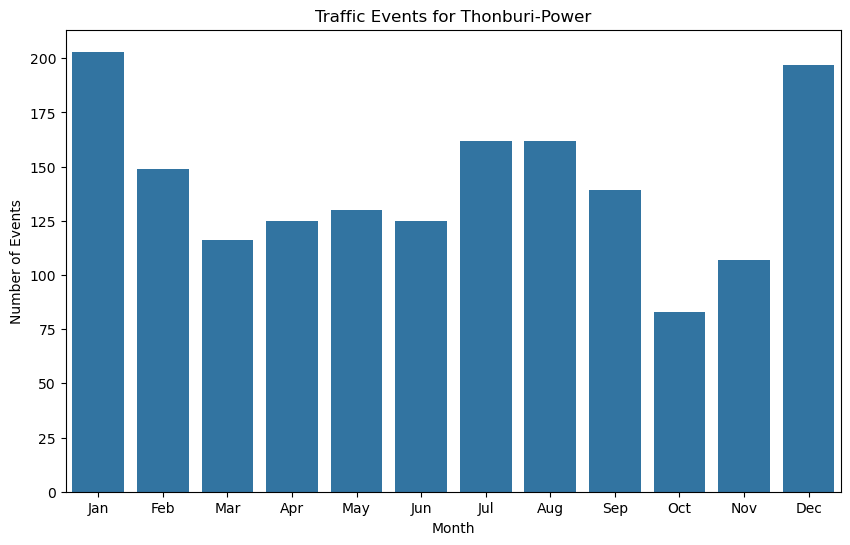

In [16]:
# Filter the data for station 'thonburi-power'
thonburi_power_data = data[data['station'] == 'thonburi-power']

plt.figure(figsize=(10, 6))
g = sns.barplot(x='start_month', y=2017, data=thonburi_power_data)
plt.title('Traffic Events for Thonburi-Power')
plt.xlabel('Month')
plt.ylabel('Number of Events')

# map month number to month name in the plot
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

In [17]:
thonburi_power_data_data = data[data['station'] == 'thonburi-power']
thonburi_power_data_dataz = dataz[dataz['station'] == 'thonburi-power']

print(thonburi_power_data_data.equals(thonburi_power_data_dataz))
print(thonburi_power_data_data)
print(thonburi_power_data_dataz)

False
start_year         station  start_month   2017   2018   2019   2020   2021  \
36          thonburi-power            1  203.0  186.0  101.0  173.0   64.0   
37          thonburi-power            2  149.0  106.0   49.0   98.0  112.0   
38          thonburi-power            3  116.0  107.0   44.0   72.0  109.0   
39          thonburi-power            4  125.0  136.0  117.0   75.0   85.0   
40          thonburi-power            5  130.0  157.0  107.0   76.0   83.0   
41          thonburi-power            6  125.0  151.0  164.0  125.0   38.0   
42          thonburi-power            7  162.0  310.0  193.0  125.0   37.0   
43          thonburi-power            8  162.0  270.0  242.0  129.0   41.0   
44          thonburi-power            9  139.0  186.0  206.0  121.0   92.0   
45          thonburi-power           10   83.0  144.0  375.0  227.0   68.0   
46          thonburi-power           11  107.0  104.0  541.0  186.0   81.0   
47          thonburi-power           12  197.0  179.0  310

In [18]:
print(thonburi_power_data_data.index)
print(thonburi_power_data_dataz.index)

Index([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype='int64')
Index([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype='int64')


In [19]:
print(thonburi_power_data_data.dtypes)
print(thonburi_power_data_dataz.dtypes)

start_year
station         object
start_month      int32
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
2023           float64
dtype: object
station         object
start_month      int64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
2023           float64
dtype: object


In [20]:
diff = thonburi_power_data_data.compare(thonburi_power_data_dataz)
print(diff)

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [ ]:
thonburi_power_data_data.reset_index(drop=True, inplace=True)
thonburi_power_data_dataz.reset_index(drop=True, inplace=True)

In [ ]:
def create_traffic_plot(station_name, year):
    data = pd.read_csv('../../../data/processed/traffic/traffic_pivot.csv', index_col=0)
    station_data = data[data['station'] == station_name]

    fig = plt.figure(figsize=(10, 6))
    g = sns.barplot(x='start_month', y=year, data=station_data)
    plt.title(f'Traffic Events for {station_name} in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    return fig

C:\Users\Bidhan\AppData\Local\Temp\ipykernel_17832\2964533908.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


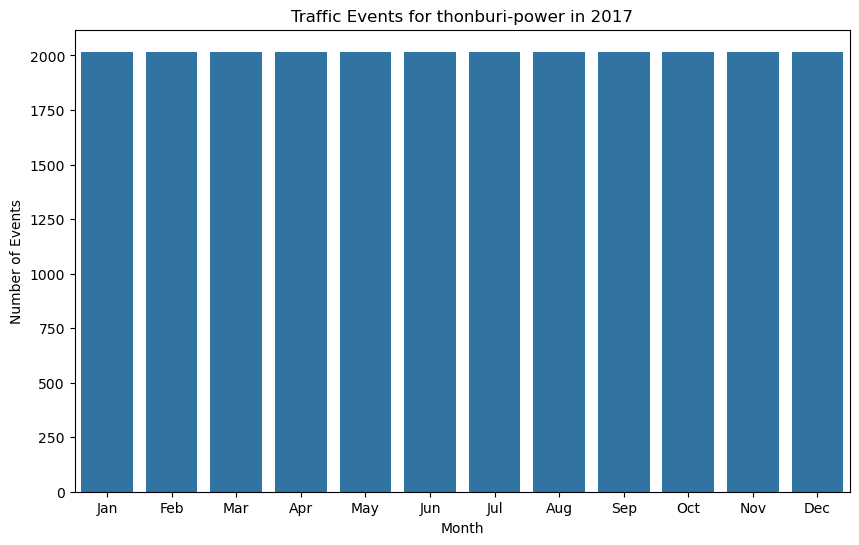

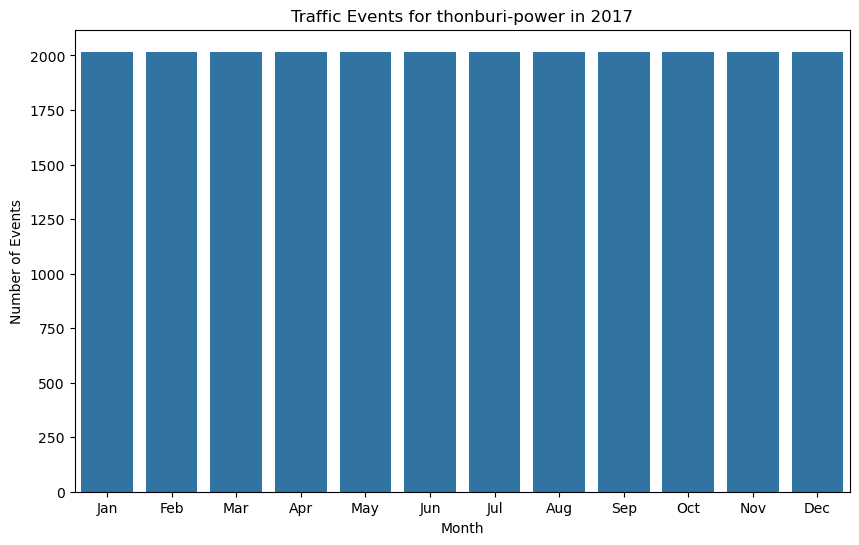

In [ ]:
create_traffic_plot('thonburi-power', 2017)